<a href="https://colab.research.google.com/github/Sshubam/FSM_ML_Assignments/blob/main/FSM_2_LinearRegression_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression eda later


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [ ]:
mdf = pd.read_csv("/Users/sshubam/Downloads/MedicalPriceDataset.csv")
mdf.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


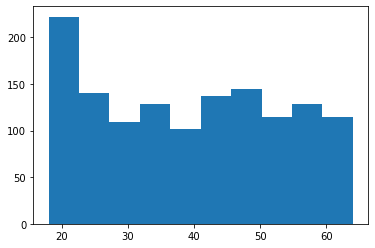

In [ ]:
plt.hist(mdf.age)
plt.show()

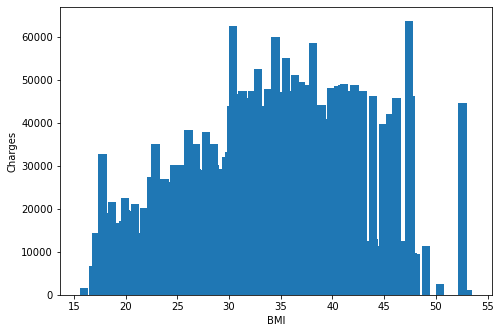

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = mdf['bmi']
ax.set_xlabel('BMI')
ax.set_ylabel('Charges')
y = mdf['charges']
ax.bar(x,y)
plt.show()

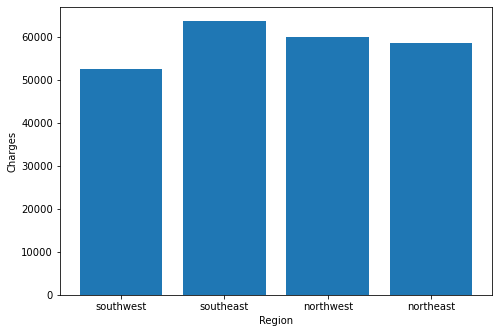

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdf['region'], mdf['charges'])
ax.set_xlabel('Region')
ax.set_ylabel('Charges')
plt.show()

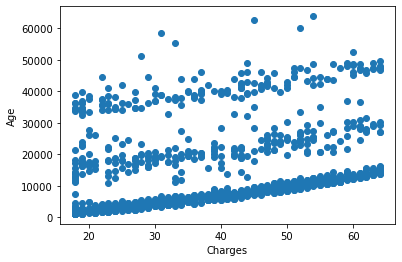

In [ ]:
plt.scatter(data=mdf, x="age", y="charges")
plt.xlabel("Charges")
plt.ylabel("Age")
plt.show()

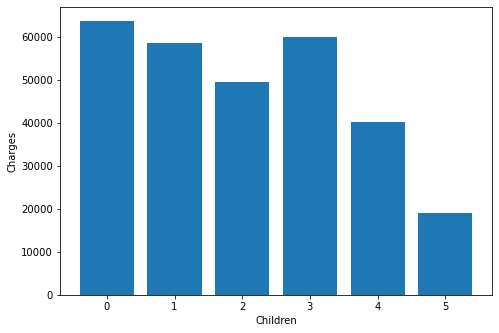

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(mdf['children'], mdf['charges'])
ax.set_xlabel('Children')
ax.set_ylabel('Charges')
plt.show()

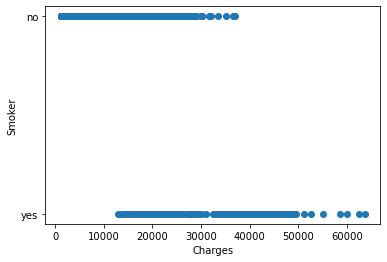

In [ ]:
plt.scatter(data=mdf, x="charges", y="smoker")
plt.xlabel("Charges")
plt.ylabel("Smoker")
plt.show()

In [ ]:
mdf['bmi'] = ( mdf['bmi'] - mdf['bmi'].mean() ) / mdf['bmi'].std()
# mdf['charges'] = ( mdf['charges'] - mdf['charges'].mean() ) / mdf['charges'].std()
mdf['age'] = ( mdf['age'] - mdf['age'].mean() ) / mdf['age'].std()
mdf['children'] = ( mdf['children'] - mdf['children'].mean() ) / mdf['children'].std()

In [ ]:
mdf

,age,sex,bmi,children,smoker,region,charges
0,-1.438227,female,-0.453151,-0.908274,yes,southwest,16884.92400
1,-1.509401,male,0.509431,-0.078738,no,southeast,1725.55230
2,-0.797655,male,0.383164,1.580335,no,southeast,4449.46200
3,-0.441782,male,-1.305043,-0.908274,no,northwest,21984.47061
4,-0.512957,male,-0.292447,-0.908274,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.768185,male,0.050278,1.580335,no,northwest,10600.54830
1334,-1.509401,female,0.206062,-0.908274,no,northeast,2205.98080
1335,-1.509401,female,1.014499,-0.908274,no,southeast,1629.83350
1336,-1.295877,female,-0.797515,-0.908274,no,southwest,2007.94500


In [ ]:
mdf = pd.get_dummies(mdf, columns=['region', 'smoker', 'sex'])

In [ ]:
mdf.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,-1.438227,-0.453151,-0.908274,16884.92400,0,0,0,1,0,1,1,0
1,-1.509401,0.509431,-0.078738,1725.55230,0,0,1,0,1,0,0,1
2,-0.797655,0.383164,1.580335,4449.46200,0,0,1,0,1,0,0,1
3,-0.441782,-1.305043,-0.908274,21984.47061,0,1,0,0,1,0,0,1
4,-0.512957,-0.292447,-0.908274,3866.85520,0,1,0,0,1,0,0,1


In [ ]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   charges           1338 non-null   float64
 4   region_northeast  1338 non-null   uint8  
 5   region_northwest  1338 non-null   uint8  
 6   region_southeast  1338 non-null   uint8  
 7   region_southwest  1338 non-null   uint8  
 8   smoker_no         1338 non-null   uint8  
 9   smoker_yes        1338 non-null   uint8  
 10  sex_female        1338 non-null   uint8  
 11  sex_male          1338 non-null   uint8  
dtypes: float64(4), uint8(8)
memory usage: 52.4 KB


In [ ]:
x = np.array(mdf.loc[:, mdf.columns != 'charges'].values)
y = np.array(mdf['charges'].values)

In [ ]:
x.shape

(1338, 11)

In [ ]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.3, random_state=42)

In [ ]:
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost is: 161894678.24932694
Cost is: 28883116.166532513
Cost is: 20533709.63809287
Cost is: 19148531.17181986
Cost is: 18914493.98339802
Cost is: 18874092.1762556
Cost is: 18866916.415646557
Cost is: 18865594.64051104
Cost is: 18865340.282422855
Cost is: 18865288.907730702


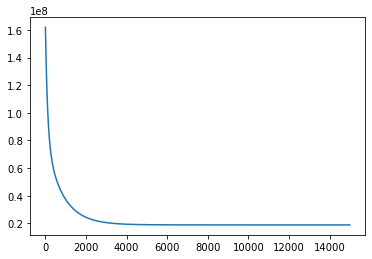

In [ ]:
plt.plot(c)

In [ ]:
def predict(X, w, b):
    return X.dot(w) + b
    
y_pred = predict(Xtest, w, b)

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_pred, Ytest)

0.7695998835279532

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse(y_pred, Ytest)

5812.250649829195

In [ ]:
# ================================================================================================

In [ ]:
mdf.head()

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,-1.438227,-0.453151,-0.908274,16884.92400,0,0,0,1,0,1,1,0
1,-1.509401,0.509431,-0.078738,1725.55230,0,0,1,0,1,0,0,1
2,-0.797655,0.383164,1.580335,4449.46200,0,0,1,0,1,0,0,1
3,-0.441782,-1.305043,-0.908274,21984.47061,0,1,0,0,1,0,0,1
4,-0.512957,-0.292447,-0.908274,3866.85520,0,1,0,0,1,0,0,1


In [ ]:
X = mdf.drop(columns = ['charges'])

In [ ]:
Y = mdf['charges']

In [ ]:
# Make sure that dimensions correct
X_train = np.array(X).T
Y_train = np.array(Y)
Y_train = Y_train.reshape(Y_train.shape[0], 1).T


assert X_train.shape[1] == Y_train.shape[1]
X_train.shape, Y_train.shape

((11, 1338), (1, 1338))

In [ ]:
# d = model(X_train, Y_train, num_iterations = 50000, learning_rate = 0.0001, print_cost = True)